# Rede neural para classificar se uma pessoa possui doença cardíaca 
Foi utilizado este dataset https://archive.ics.uci.edu/ml/datasets/Heart+Disease

In [1]:
# Importing libs
import pandas as pd
import numpy as np
import keras
from keras.metrics import *
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import *
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
# Reading data from csv
data = pd.read_csv('heart.csv')
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## Dividindo os dados entre treino e teste
80% parq treino e 20% para teste

In [3]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data.iloc[:,0:13], data.iloc[:,13], test_size = 0.2, shuffle = True, stratify = data['target'])

In [4]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
107,45,0,0,138,236,0,0,152,1,0.2,1,0,2
216,62,0,2,130,263,0,1,97,0,1.2,1,1,3
227,35,1,0,120,198,0,1,130,1,1.6,1,0,3
284,61,1,0,140,207,0,0,138,1,1.9,2,1,3
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,54,1,0,110,206,0,0,108,1,0.0,1,1,2
244,56,1,0,132,184,0,0,105,1,2.1,1,1,1
73,51,1,0,140,261,0,0,186,1,0.0,2,0,2
265,66,1,0,112,212,0,0,132,1,0.1,2,1,2


In [5]:
y_train

107    1
216    0
227    0
284    0
75     1
      ..
264    0
244    0
73     1
265    0
47     1
Name: target, Length: 242, dtype: int64

In [6]:
x_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
267,49,1,2,118,149,0,0,126,0,0.8,2,3,2
205,52,1,0,128,255,0,1,161,1,0.0,2,1,3
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
223,56,0,0,200,288,1,0,133,1,4.0,0,2,3
242,64,1,0,145,212,0,0,132,0,2.0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,50,1,0,150,243,0,0,128,0,2.6,1,0,3
190,51,0,0,130,305,0,1,142,1,1.2,1,0,3
289,55,0,0,128,205,0,2,130,1,2.0,1,1,3
145,70,1,1,156,245,0,0,143,0,0.0,2,0,2


In [7]:
y_test

267    0
205    0
188    0
223    0
242    0
      ..
184    0
190    0
289    0
145    1
42     1
Name: target, Length: 61, dtype: int64

## Preparando os dados para serem usados
Normalização das colunas

In [8]:
from sklearn.preprocessing import MinMaxScaler

In [9]:
scaler = MinMaxScaler()

In [10]:
train = x_train.iloc[:,:].values.astype(float)

In [11]:
test = x_test.iloc[:,:].values.astype(float)

In [12]:
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.fit_transform(test)

In [13]:
x_train_normalized = pd.DataFrame(train_scaled,columns=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach','exang', 'oldpeak', 'slope', 'ca', 'thal'])
x_test_normalized = pd.DataFrame(test_scaled,columns=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach','exang', 'oldpeak', 'slope', 'ca', 'thal'])

In [14]:
x_train_normalized

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.333333,0.0,0.000000,0.448980,0.251142,0.0,0.0,0.618321,1.0,0.032258,0.5,0.00,0.666667
1,0.687500,0.0,0.666667,0.367347,0.312785,0.0,0.5,0.198473,0.0,0.193548,0.5,0.25,1.000000
2,0.125000,1.0,0.000000,0.265306,0.164384,0.0,0.5,0.450382,1.0,0.258065,0.5,0.00,1.000000
3,0.666667,1.0,0.000000,0.469388,0.184932,0.0,0.0,0.511450,1.0,0.306452,1.0,0.25,1.000000
4,0.541667,0.0,0.333333,0.418367,0.283105,0.0,0.0,0.687023,0.0,0.225806,0.5,0.00,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,0.520833,1.0,0.000000,0.163265,0.182648,0.0,0.0,0.282443,1.0,0.000000,0.5,0.25,0.666667
238,0.562500,1.0,0.000000,0.387755,0.132420,0.0,0.0,0.259542,1.0,0.338710,0.5,0.25,0.333333
239,0.458333,1.0,0.000000,0.469388,0.308219,0.0,0.0,0.877863,1.0,0.000000,1.0,0.00,0.666667
240,0.770833,1.0,0.000000,0.183673,0.196347,0.0,0.0,0.465649,1.0,0.016129,1.0,0.25,0.666667


In [15]:
x_test_normalized

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.341463,1.0,0.666667,0.163265,0.078603,0.0,0.0,0.256098,0.0,0.181818,1.0,1.000000,0.5
1,0.414634,1.0,0.000000,0.265306,0.541485,0.0,0.5,0.682927,1.0,0.000000,1.0,0.333333,1.0
2,0.365854,1.0,0.666667,0.387755,0.445415,0.0,0.5,0.707317,0.0,0.136364,0.5,0.333333,1.0
3,0.512195,0.0,0.000000,1.000000,0.685590,1.0,0.0,0.341463,1.0,0.909091,0.0,0.666667,1.0
4,0.707317,1.0,0.000000,0.438776,0.353712,0.0,0.0,0.329268,0.0,0.454545,0.5,0.666667,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,0.365854,1.0,0.000000,0.489796,0.489083,0.0,0.0,0.280488,0.0,0.590909,0.5,0.000000,1.0
57,0.390244,0.0,0.000000,0.285714,0.759825,0.0,0.5,0.451220,1.0,0.272727,0.5,0.000000,1.0
58,0.487805,0.0,0.000000,0.265306,0.323144,0.0,1.0,0.304878,1.0,0.454545,0.5,0.333333,1.0
59,0.853659,1.0,0.333333,0.551020,0.497817,0.0,0.0,0.463415,0.0,0.000000,1.0,0.000000,0.5


## Criando o modelo

In [16]:
model1 = Sequential()

In [17]:
model1.add(Dense(1000, activation='relu', input_shape=(13,)))
model1.add(Dropout(0.90))
model1.add(Dense(1, activation='sigmoid'))

In [18]:
model1.compile(loss='binary_crossentropy',optimizer=Adam(learning_rate = 0.01),
               metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


## Treinando o modelo
Usou-se batch gradient descent junto com early stopping

In [19]:
batch_size = 242
epochs = 100
history = model1.fit(
    x_train_normalized, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=0,
    validation_data=(x_test_normalized, y_test),
    shuffle = True,
    callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss',patience=10,min_delta=0.01)])

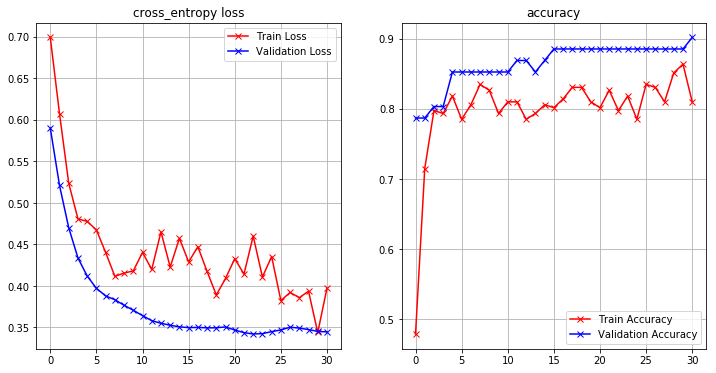

In [20]:
def plot_loss_accuracy(history):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"],'r-x', label="Train Loss")
    ax.plot(history.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('cross_entropy loss')
    ax.grid(True)


    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history["accuracy"],'r-x', label="Train Accuracy")
    ax.plot(history.history["val_accuracy"],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('accuracy')
    ax.grid(True)
    

plot_loss_accuracy(history)

## Avaliando o classificador

In [21]:
true_positives = 0
false_positives = 0
true_negatives = 0
false_negatives = 0

predictions = []

for index, row in x_test_normalized.iterrows():
    real = (y_test.iloc[index])
    predicted = int(np.around(model1.predict(np.array(row.values).reshape(1,13)))[0][0])
    predictions.append(predicted)
    
    # true positives
    if real==1 and predicted==1:
        true_positives += 1
    
    # false positives
    if real==0 and predicted==1:
        false_positives += 1
    
    # true negatives
    if real==0 and predicted==0:
        true_negatives += 1
        
    # false negatives
    if real==1 and predicted==0:
        false_negatives += 1
        
total = true_positives + true_negatives + false_positives + false_negatives
acertos = true_negatives + true_positives
predictions = np.array(predictions)

### Acurácia e taxa de erro
Total de 61 casos de teste

In [22]:
print('Total de testes:',total)
print('Acurácia:',acertos/total)
print('Taxa de erro:',(total-acertos)/total)

Total de testes: 61
Acurácia: 0.9016393442622951
Taxa de erro: 0.09836065573770492


In [23]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, roc_auc_score, roc_curve

### Matriz de confusão

In [24]:
confusion_matrix(y_test,predictions)

array([[24,  4],
       [ 2, 31]])

### Precision e Recall

In [25]:
print('Precision:',precision_score(y_test,predictions))
print('Recall:',recall_score(y_test,predictions))

Precision: 0.8857142857142857
Recall: 0.9393939393939394


### AUC-ROC

In [26]:
roc_auc_score(y_test,predictions)

0.8982683982683983

### Curva ROC

In [27]:
fpr, tpr, _ = roc_curve(y_test,predictions)

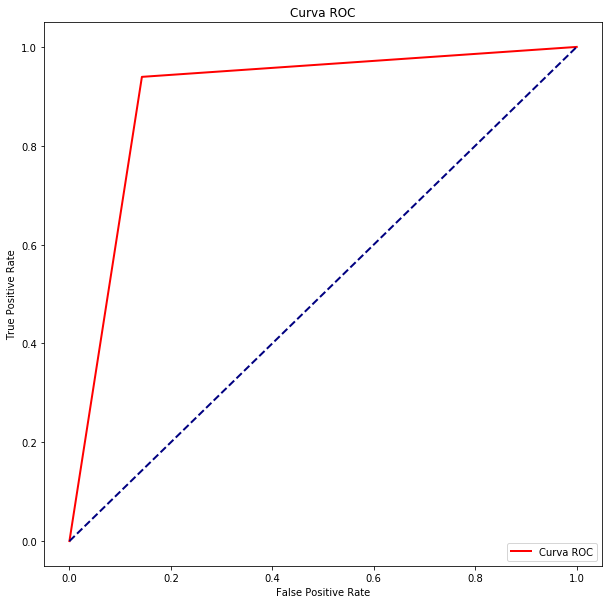

In [28]:
%matplotlib inline
plt.figure(figsize=(10,10))
plt.plot(fpr,tpr, color='red', label='Curva ROC',lw=2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc="lower right")